In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
prem = pd.read_csv("stats.csv", ) #I had to look at the csv file and chage format some column headings
print(prem)

                     team  wins  losses  goals  total_yel_card  \
0       Manchester United  28.0     5.0   83.0            60.0   
1                 Chelsea  24.0     3.0   64.0            62.0   
2               Liverpool  20.0    10.0   57.0            44.0   
3                 Arsenal  19.0     8.0   63.0            59.0   
4       Tottenham Hotspur  17.0    12.0   57.0            48.0   
..                    ...   ...     ...    ...             ...   
235     Huddersfield Town   9.0    19.0   28.0            62.0   
236          Swansea City   8.0    21.0   28.0            51.0   
237           Southampton   7.0    16.0   37.0            63.0   
238            Stoke City   7.0    19.0   35.0            62.0   
239  West Bromwich Albion   6.0    19.0   31.0            73.0   

     total_red_card  total_scoring_att  ontarget_scoring_att  hit_woodwork  \
0               1.0              698.0                 256.0          21.0   
1               4.0              636.0             

In [3]:
#Inserting missing columns I will need (draws and points)
prem.insert(4, 'draws', 38 - prem["wins"] - prem["losses"])
prem.insert(5, 'points', prem["wins"] * 3 + prem["draws"])
print(prem)

                     team  wins  losses  goals  draws  points  total_yel_card  \
0       Manchester United  28.0     5.0   83.0    5.0    89.0            60.0   
1                 Chelsea  24.0     3.0   64.0   11.0    83.0            62.0   
2               Liverpool  20.0    10.0   57.0    8.0    68.0            44.0   
3                 Arsenal  19.0     8.0   63.0   11.0    68.0            59.0   
4       Tottenham Hotspur  17.0    12.0   57.0    9.0    60.0            48.0   
..                    ...   ...     ...    ...    ...     ...             ...   
235     Huddersfield Town   9.0    19.0   28.0   10.0    37.0            62.0   
236          Swansea City   8.0    21.0   28.0    9.0    33.0            51.0   
237           Southampton   7.0    16.0   37.0   15.0    36.0            63.0   
238            Stoke City   7.0    19.0   35.0   12.0    33.0            62.0   
239  West Bromwich Albion   6.0    19.0   31.0   13.0    31.0            73.0   

     total_red_card  total_

In [4]:
#Creating 09-10 subset dataframe
ten_season = prem.loc[:, 'season'] == '2009-2010'
ten_df = prem[ten_season]
print(ten_df)

                       team  wins  losses  goals  draws  points  \
60                  Chelsea  27.0     6.0  103.0    5.0    86.0   
61        Manchester United  27.0     7.0   86.0    4.0    85.0   
62                  Arsenal  23.0     9.0   83.0    6.0    75.0   
63        Tottenham Hotspur  21.0    10.0   67.0    7.0    70.0   
64                Liverpool  18.0    11.0   61.0    9.0    63.0   
65          Manchester City  18.0     7.0   73.0   13.0    67.0   
66              Aston Villa  17.0     8.0   52.0   13.0    64.0   
67                  Everton  16.0     9.0   60.0   13.0    61.0   
68          Birmingham City  13.0    14.0   38.0   11.0    50.0   
69         Blackburn Rovers  13.0    14.0   41.0   11.0    50.0   
70                   Fulham  12.0    16.0   39.0   10.0    46.0   
71               Stoke City  11.0    13.0   34.0   14.0    47.0   
72               Sunderland  11.0    16.0   48.0   11.0    44.0   
73         Bolton Wanderers  10.0    19.0   42.0    9.0    39.

In [5]:
#Assigning variable names to some columns 

tendf_wins = ten_df.loc[:, 'wins']
tendf_losses = ten_df.loc[:, 'losses']
tendf_goals = ten_df.loc[:, 'goals']
tendf_name = ten_df.loc[:, 'team']
tendf_yellows = ten_df.loc[:, 'total_yel_card']
tendf_ints = ten_df.loc[:, 'interception']
tendf_touches = ten_df.loc[:, 'touches']
tendf_points = ten_df.loc[:, 'points']

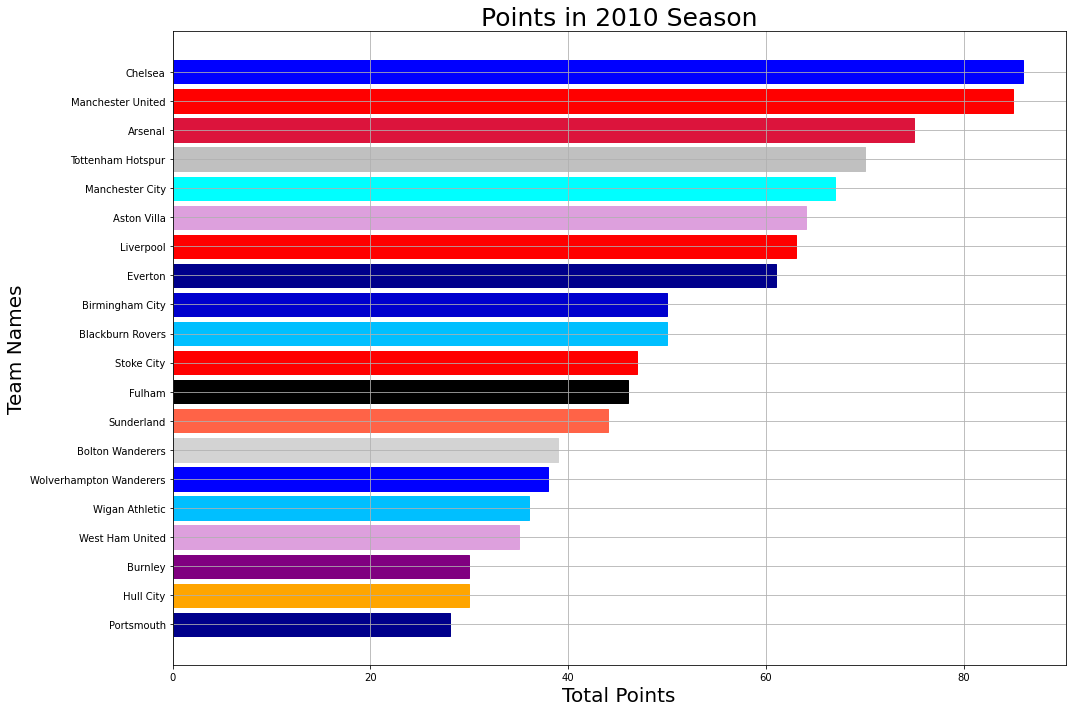

In [17]:
#Chart showing Team and Number of Points

names_points = ten_df.sort_values("points")


plt.figure(figsize=(15,10))
bars = plt.barh(names_points["team"], names_points["points"])
bars[19].set_color('blue')
bars[18].set_color('red')
bars[17].set_color('crimson')
bars[16].set_color('silver')
bars[15].set_color('cyan')
bars[14].set_color('plum')
bars[13].set_color('red')
bars[12].set_color('darkblue')
bars[11].set_color('mediumblue')
bars[10].set_color('deepskyblue')
bars[9].set_color('red')
bars[8].set_color('black')
bars[7].set_color('tomato')
bars[6].set_color('lightgray')
bars[5].set_color('blue')
bars[4].set_color('deepskyblue')
bars[3].set_color('plum')
bars[2].set_color('purple')
bars[1].set_color('orange')
bars[0].set_color('darkblue')
plt.title('Points in 2010 Season', size = 25)
plt.ylabel('Team Names', size = 20)
plt.xlabel('Total Points', size = 20)
plt.grid()
plt.tight_layout()
plt.show()

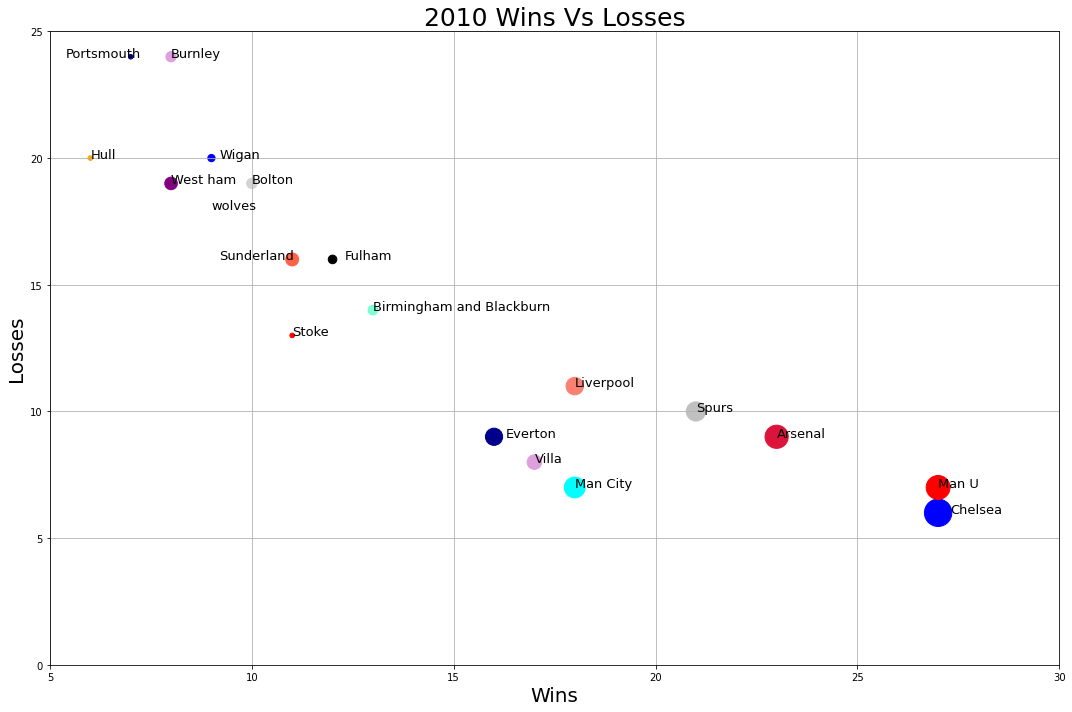

In [20]:
#Scatter plot wins V losses with goals as size.

fig = plt.figure(figsize=(15,10))


#Normalising goals so that there is increased contrast in sizes
max_goals = max(tendf_goals)
min_goals = min(tendf_goals)

normalized_goals = [(size - min_goals) / (max_goals - min_goals) * 750 for size in tendf_goals]


colors = np.array(['blue','red','crimson','silver','salmon','cyan','plum','darkblue','mediumblue','aquamarine','black','red','tomato','lightgray','blue','goldenrod','plum','purple','darkblue','orange'])  
plt.scatter(tendf_wins, tendf_losses, c = colors, s = normalized_goals)


    
plt.ylabel('Losses', size = 20)
plt.xlabel('Wins', size = 20)
plt.text(27.3,6,'Chelsea', size = 13)
plt.text(27,7,'Man U', size = 13)
plt.text(23,9,'Arsenal', size = 13)
plt.text(21,10,'Spurs', size = 13)
plt.text(18,11,'Liverpool', size = 13)
plt.text(18,7,'Man City', size = 13)
plt.text(17,8,'Villa', size = 13)
plt.text(16.3,9,'Everton', size = 13)
plt.text(13,14,'Birmingham and Blackburn', size = 13)
plt.text(12.3,16,'Fulham', size = 13)
plt.text(11,13,'Stoke', size = 13)
plt.text(9.2,16,'Sunderland', size = 13)
plt.text(10,19,'Bolton', size = 13)
plt.text(9.2,20,'Wigan', size = 13)
plt.text(9,18,'wolves', size = 13)
plt.text(8,24,'Burnley', size = 13)
plt.text(8,19,'West ham', size = 13)
plt.text(5.4,24,'Portsmouth', size = 13)
plt.text(6,20,'Hull', size = 13)
plt.title('2010 Wins Vs Losses', size = 25)
plt.ylim(0,25)
plt.xlim(5,30)
plt.grid()
plt.tight_layout()
plt.show()

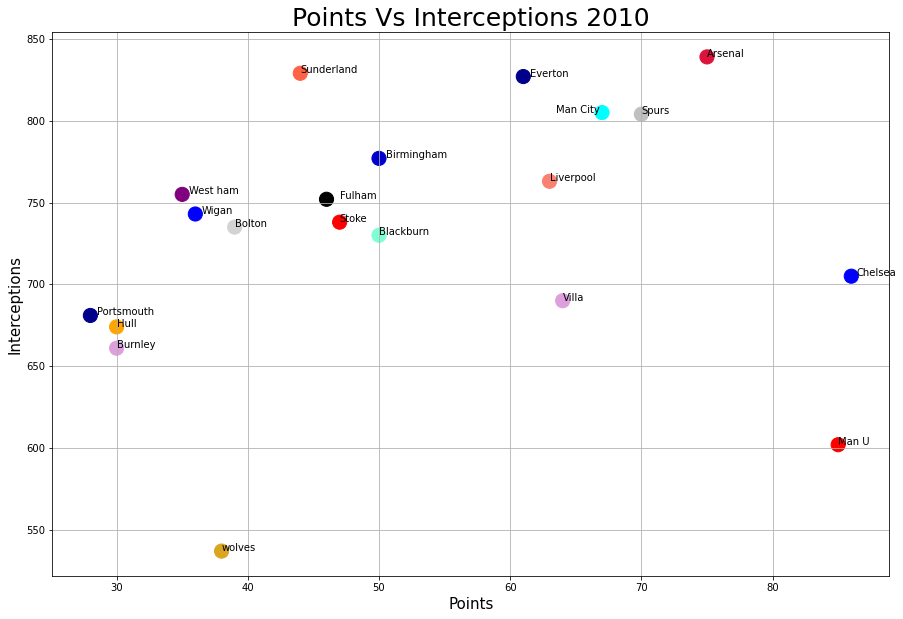

In [23]:
#chart of interceptions against points 

fig = plt.figure(figsize=(15,10))
plt.scatter(tendf_points, tendf_ints, c = colors, s = 200)
plt.ylabel('Interceptions', size = 20)
plt.xlabel('Points', size = 20)
plt.text(86.4,705,'Chelsea')
plt.text(85,602,'Man U')
plt.text(75,839,'Arsenal')
plt.text(70,804,'Spurs')
plt.text(63,763,'Liverpool')
plt.text(63.5,805,'Man City')
plt.text(64,690,'Villa')
plt.text(61.5,827,'Everton')
plt.text(50.5,777,'Birmingham')
plt.text(50,730,'Blackburn')
plt.text(47,752,'Fulham')
plt.text(47,738,'Stoke')
plt.text(44,829,'Sunderland')
plt.text(39,735,'Bolton')
plt.text(36.5,743,'Wigan')
plt.text(38,537,'wolves')
plt.text(30,661,'Burnley')
plt.text(35.5,755,'West ham')
plt.text(28.5,681,'Portsmouth')
plt.text(30,674,'Hull')
plt.title("Points Vs Interceptions 2010", size = 25)
plt.grid()
plt.show()

In [25]:
np.corrcoef(tendf_ints, tendf_points) # Not correlated!

array([[1.        , 0.20728542],
       [0.20728542, 1.        ]])

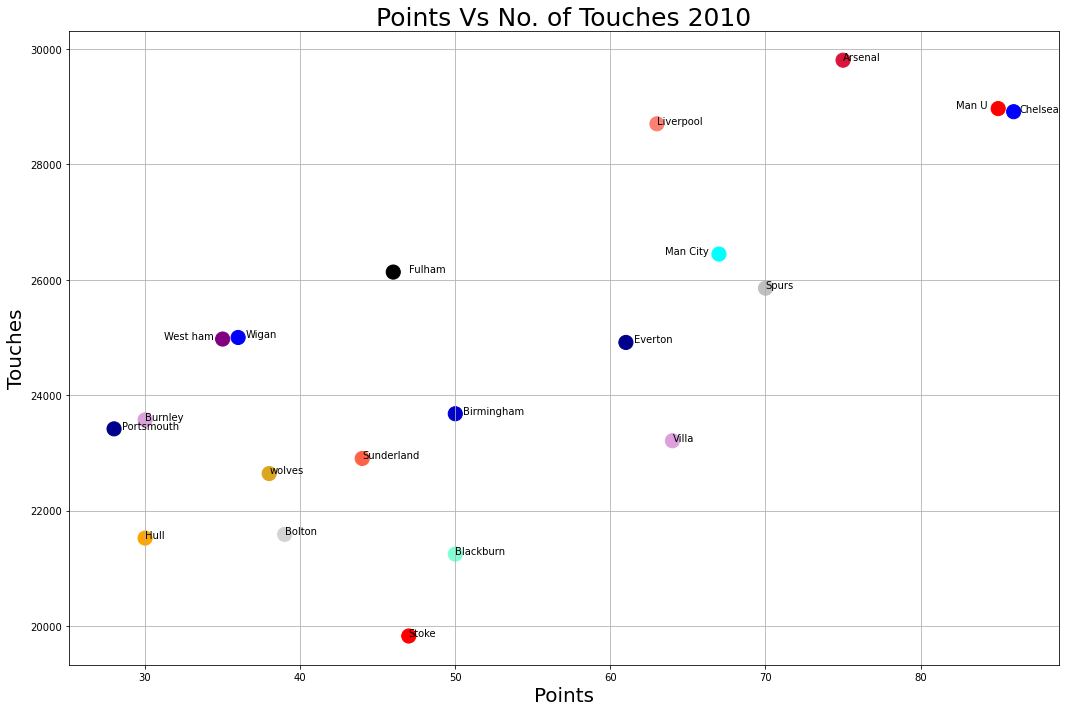

In [30]:
#Chart of Number of touches against points

fig = plt.figure(figsize=(15,10))
plt.scatter(tendf_points, tendf_touches, c = colors, s = 200)
plt.ylabel('Touches', size = 20)
plt.xlabel('Points', size = 20)
plt.text(86.4,28914,'Chelsea')
plt.text(82.3,28968,'Man U')
plt.text(75,29807,'Arsenal')
plt.text(70,25855,'Spurs')
plt.text(63,28704,'Liverpool')
plt.text(63.5,26446,'Man City')
plt.text(64,23210,'Villa')
plt.text(61.5,24914,'Everton')
plt.text(50.5,23678,'Birmingham')
plt.text(50,21245,'Blackburn')
plt.text(47,26134,'Fulham')
plt.text(47,19825,'Stoke')
plt.text(44,22903,'Sunderland')
plt.text(39,21587,'Bolton')
plt.text(36.5,25000,'Wigan')
plt.text(38,22641,'wolves')
plt.text(30,23571,'Burnley')
plt.text(31.2,24973,'West ham')
plt.text(28.5,23416,'Portsmouth')
plt.text(30,21522,'Hull')
plt.title("Points Vs No. of Touches 2010", size = 25)
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
np.corrcoef(tendf_touches, tendf_points)

array([[1.       , 0.7148671],
       [0.7148671, 1.       ]])

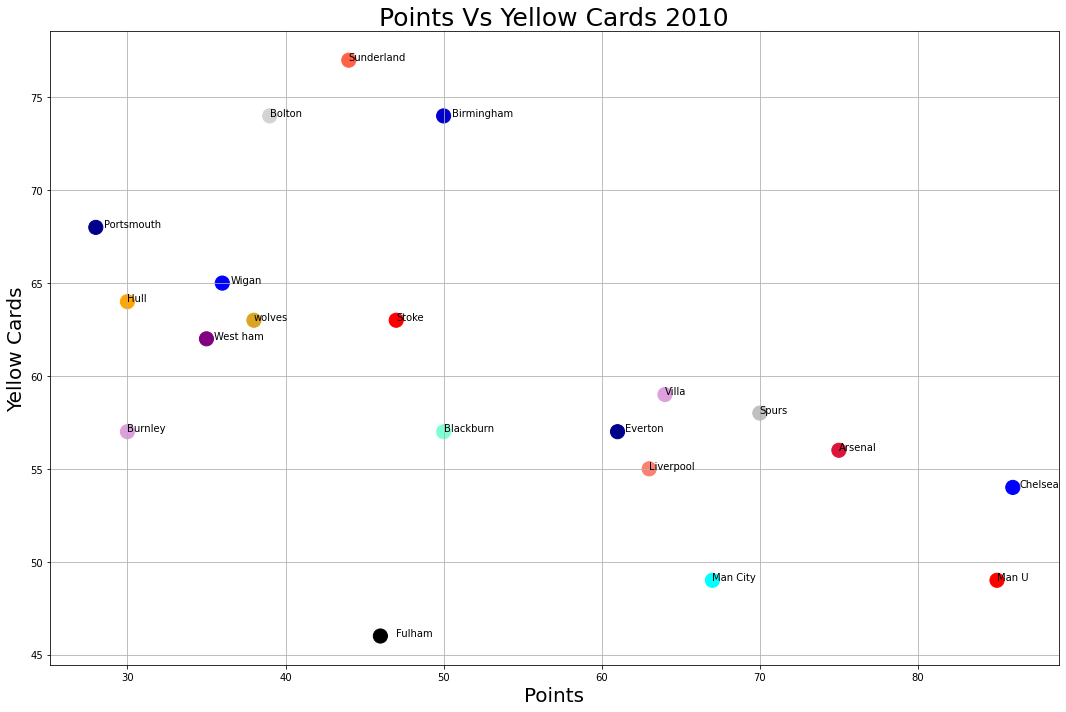

In [33]:
#Chart of points against number of yellow cards


fig = plt.figure(figsize=(15,10))
plt.scatter(tendf_points, tendf_yellows, c = colors, s = 200)
plt.ylabel('Yellow Cards', size = 20)
plt.xlabel('Points', size = 20)
plt.text(86.4,54,'Chelsea')
plt.text(85,49,'Man U')
plt.text(75,56,'Arsenal')
plt.text(70,58,'Spurs')
plt.text(63,55,'Liverpool')
plt.text(67,49,'Man City')
plt.text(64,59,'Villa')
plt.text(61.5,57,'Everton')
plt.text(50.5,74,'Birmingham')
plt.text(50,57,'Blackburn')
plt.text(47,46,'Fulham')
plt.text(47,63,'Stoke')
plt.text(44,77,'Sunderland')
plt.text(39,74,'Bolton')
plt.text(36.5,65,'Wigan')
plt.text(38,63,'wolves')
plt.text(30,57,'Burnley')
plt.text(35.5,62,'West ham')
plt.text(28.5,68,'Portsmouth')
plt.text(30,64,'Hull')
plt.title("Points Vs Yellow Cards 2010", size = 25)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
np.corrcoef(tendf_yellows, tendf_points)

array([[ 1.        , -0.54883836],
       [-0.54883836,  1.        ]])

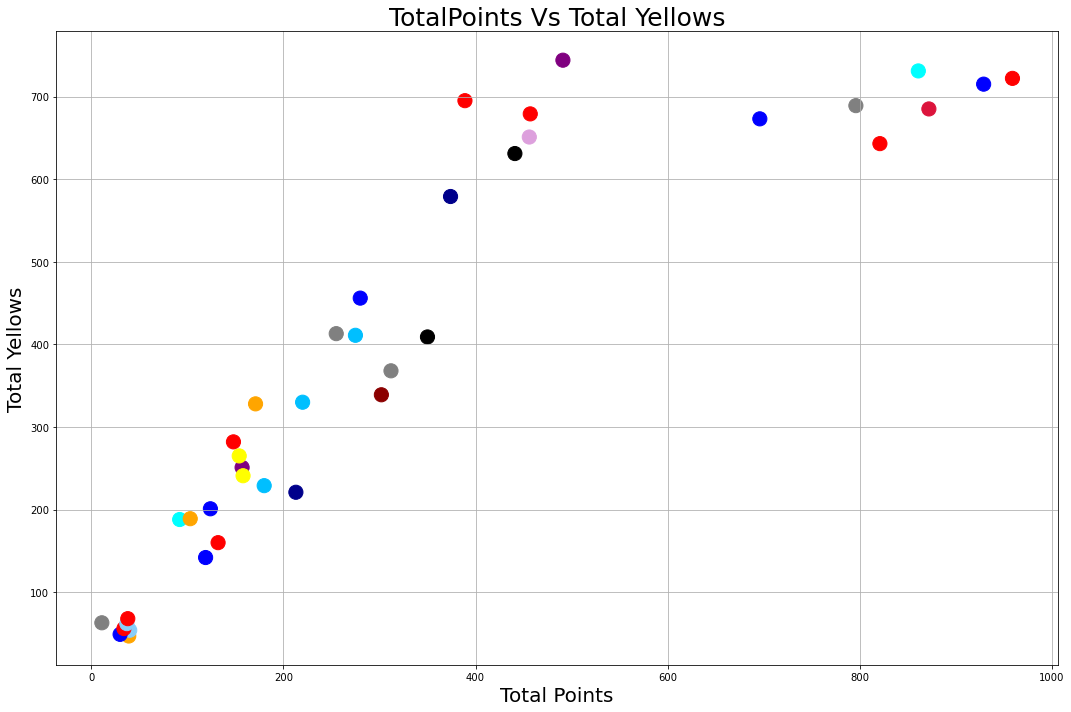

In [38]:
#grouping by Team and summing all points and yellow cards
total_points = prem.groupby("team")["points"].sum()
total_yellows = prem.groupby("team")["total_yel_card"].sum()
new_colors = np.array(["r", "crimson", "plum", "blue", "deepskyblue", "orange", "grey", "lightskyblue", "purple", "b", "r", "blue", "deepskyblue", "grey", "b", "black","lightskyblue", "orange", "darkblue", "r", "cyan", "red", "r", "black", "yellow", "deepskyblue", "cyan", "b", "r", "darkred", "red", "r", "grey", "grey", "yellow", "darkblue", "purple", "b", "orange"])

fig = plt.figure(figsize=(15,10))
plt.scatter(total_points, total_yellows, s = 200, c = new_colors)
plt.ylabel('Total Yellows', size = 20)
plt.xlabel('Total Points', size = 20)
plt.title("TotalPoints Vs Total Yellows", size = 25)
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
np.corrcoef(total_points, total_yellows)

array([[1.        , 0.89744747],
       [0.89744747, 1.        ]])

        team  total_yel_card  points
1    Chelsea            62.0    83.0
21   Chelsea            63.0    85.0
41   Chelsea            50.0    83.0
60   Chelsea            54.0    86.0
81   Chelsea            59.0    71.0
105  Chelsea            74.0    64.0
122  Chelsea            51.0    75.0
142  Chelsea            57.0    82.0
160  Chelsea            73.0    87.0
189  Chelsea            58.0    50.0
200  Chelsea            72.0    93.0
223  Chelsea            42.0    70.0
                  team  total_yel_card  points
0    Manchester United            60.0    89.0
20   Manchester United            51.0    87.0
40   Manchester United            61.0    90.0
61   Manchester United            49.0    85.0
80   Manchester United            56.0    80.0
101  Manchester United            51.0    89.0
120  Manchester United            57.0    89.0
146  Manchester United            66.0    64.0
163  Manchester United            64.0    70.0
183  Manchester United            65.0    66.0
20

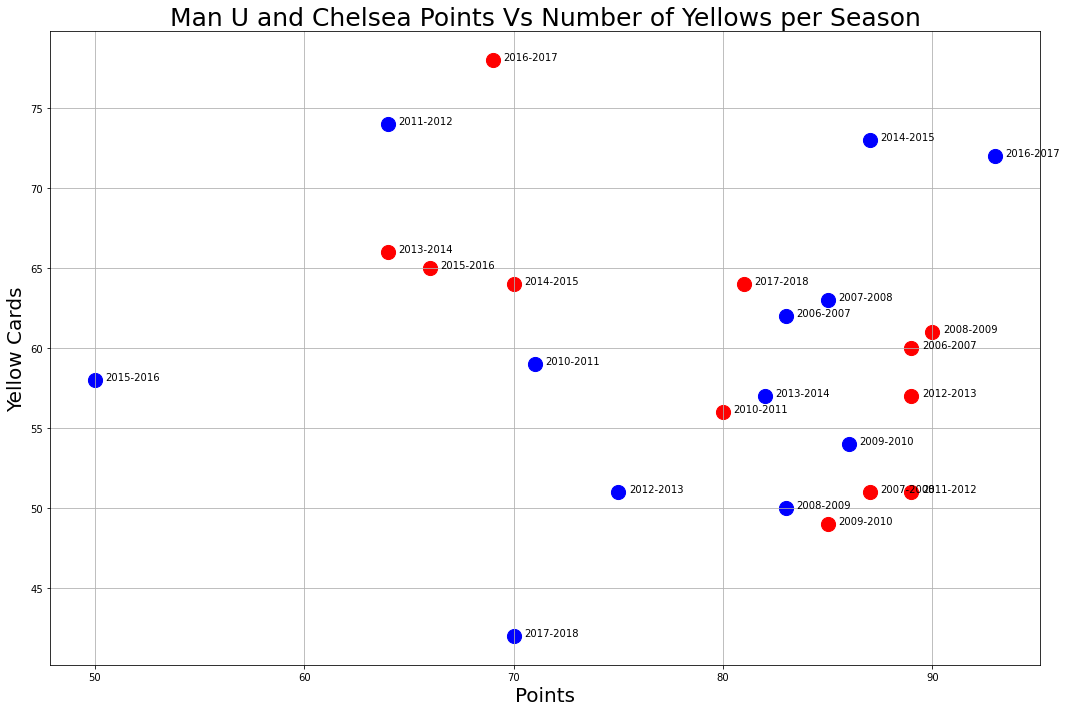

In [42]:
#creating a subset dataframe for Chelsea and United and including points and yellow card columns
chelsea_yellows_points_df = prem[prem["team"] == "Chelsea"][["team", "total_yel_card", "points"]]
Chelsea_yellows_perseason = chelsea_yellows_points_df.loc[:, 'total_yel_card'] 
Chelsea_points_perseason = chelsea_yellows_points_df.loc[:, 'points']
print(chelsea_yellows_points_df)


ManU_yellows_points_df = prem[prem["team"] == "Manchester United"][["team", "total_yel_card", "points"]]
ManU_yellows_perseason = ManU_yellows_points_df.loc[:, 'total_yel_card'] 
ManU_points_perseason = ManU_yellows_points_df.loc[:, 'points']
print(ManU_yellows_points_df)


fig = plt.figure(figsize=(15,10))
plt.scatter(Chelsea_points_perseason, Chelsea_yellows_perseason, s = 200, color = "blue")
plt.scatter(ManU_points_perseason, ManU_yellows_perseason, s = 200, color = "red")
plt.xlabel('Points', size = 20)
plt.ylabel('Yellow Cards', size = 20)
plt.title("Man U and Chelsea Points Vs Number of Yellows per Season", size = 25)
plt.text(83.5, 62, '2006-2007')
plt.text(85.5, 63, '2007-2008')
plt.text(83.5, 50, '2008-2009')
plt.text(86.5, 54, '2009-2010')
plt.text(71.5, 59, '2010-2011')
plt.text(64.5, 74, '2011-2012')
plt.text(75.5, 51, '2012-2013')
plt.text(82.5, 57, '2013-2014')
plt.text(87.5, 73, '2014-2015')
plt.text(50.5, 58, '2015-2016')
plt.text(93.5, 72, '2016-2017')
plt.text(70.5, 42, '2017-2018')
plt.text(89.5, 60, '2006-2007')
plt.text(87.5, 51, '2007-2008')
plt.text(90.5, 61, '2008-2009')
plt.text(85.5, 49, '2009-2010')
plt.text(80.5, 56, '2010-2011')
plt.text(89.5, 51, '2011-2012')
plt.text(89.5, 57, '2012-2013')
plt.text(64.5, 66, '2013-2014')
plt.text(70.5, 64, '2014-2015')
plt.text(66.5, 65, '2015-2016')
plt.text(69.5, 78, '2016-2017')
plt.text(81.5, 64, '2017-2018')
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
np.corrcoef(Chelsea_points_perseason, Chelsea_yellows_perseason)

array([[1.        , 0.19402028],
       [0.19402028, 1.        ]])

In [45]:
np.corrcoef(ManU_points_perseason, ManU_yellows_perseason)

array([[ 1.        , -0.69214776],
       [-0.69214776,  1.        ]])